In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from scipy.stats import mode
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
# testing
from nose.tools import assert_count_equal, assert_equal, assert_almost_equals
from numpy.testing import *
from pandas.testing import assert_frame_equal

# Please do not remove this: 
np.random.seed(31415)

In [2]:
def rsquare(predicted,true): ##  1D numpy arrays of the same length
    '''Return rsquare'''
    if len(predicted) == len(true):
        SS_res = sum((np.array(true) - np.array(predicted))**2)
        SS_tot = sum((true - np.mean(true)**2))
        
        if SS_tot == 0:
            return 0

        return 1 - (SS_res /  SS_tot)
                 
rsquare([2,3,5,6,7,34],[2,3,5,6,7,34])

1.0

In [3]:
u, v = np.random.randint(0,546,876),  np.random.randint(0,546,876)
rsquare(u,v)

1.6785356907474767

In [6]:
from sklearn.metrics import r2_score
rsquare(u,v) == r2_score(u,v)


In [7]:
def accuracy(y,yhat): ## u, v are 1D numpy arrays of the same length
    '''Return accuracy '''
    return (y==yhat).mean()

u, v = np.random.choice(a=[False, True], size=(4) ),np.random.choice(a=[False, True], size=(4) )
print(u, 'y')
print(v,'yhat')
accuracy(u,v)

[False  True False  True] y
[False False False  True] yhat


0.75

In [8]:
def precision(y, yhat):
    return sum([y[i] == yhat[i] for i in range(len(y)) if y[i] == True]) / yhat.sum()

In [17]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

true_A, true_B, true_C = ['A' for _ in range(600)], ['B' for _ in range(200)], ['C' for _ in range(200)]
pred_A, pred_B, pred_C = ['A' for _ in range(900)], ['B' for _ in range(80)], ['C' for _ in range(20)]


true = np.append(true_A, true_B)
true = np.append(true, true_C)

pred = np.append(pred_A, pred_B)
pred = np.append(pred, pred_C)

len(true) == len(pred)

f1_score(true,pred, average=None)

array([0.8       , 0.        , 0.18181818])

In [21]:
v1 = {
    "precision": {"A": 600/900, "B": 50/80, "C": 10/20},
    "recall": {"A": 600/600, "B": 50/200, "C": 10/200},
    "F1": {"A": ((600/900*600/600)/(600/900+600/600))*2, "B": ((50/80*50/200)/(50/80+50/200))*2, "C": ((10/20*10/200)/(10/20+10/200))*2},
}

#
v2 = {"macroF1": (((600/900*600/600)/(600/900+600/600))*2 + ((50/80*50/200)/(50/80+50/200))*2 + ((10/20*10/200)/(10/20+10/200))*2)/3  , 
      "microF1": 660/1000, 
      "weightedF1": ((((600/900*600/600)/(600/900+600/600))*2)*600 + (((50/80*50/200)/(50/80+50/200))*2)*200 + (((10/20*10/200)/(10/20+10/200))*2)*200)/1000 }

# Diagonaal / Alles
accuracy = 660/1000

v1, v2, accuracy

({'precision': {'A': 0.6666666666666666, 'B': 0.625, 'C': 0.5},
  'recall': {'A': 1.0, 'B': 0.25, 'C': 0.05},
  'F1': {'A': 0.8, 'B': 0.35714285714285715, 'C': 0.09090909090909091}},
 {'macroF1': 0.416017316017316,
  'microF1': 0.66,
  'weightedF1': 0.5696103896103896},
 0.66)

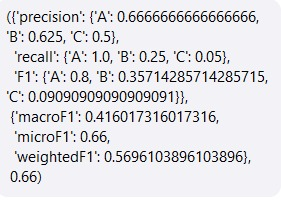